# TODO:
- [ ] Write the MDP formulation -> Aline
- [X] The discretization model adopted
  - Será que tá pronto? Falei bastante no State Representation.

Aspectos que devem ser abordados:
- [ ] computational cost
  - [ ] Falar que o gargalo aqui é processamento e não uso de memória
- [ ] optimality
- [ ] influence of reward function
- [X] state and action space sizes

Também precisamos definir
- [ ] How the problem was modeled
  - [ ] Precisa falar alguma coisa aqui?
- [ ] Implementation specifics and restrictions
  - [ ] Precisa falar alguma coisa aqui?

Problem
- [X] The nature of your environment (episodic/not episodic, deterministic/stochastic)
- [X] What are your terminal states (when they exist)
- [X] How is your reward function defined
- [X] All parameters employed in your methods (discount factor, step size, etc.)

Outros:
- [ ] Gerar um requirements.txt completo e instruções confiáveis para instalação.
- [ ] Computational cost of SARSA-Lambda (Final Thoughts)
- [ ] Plot the optimal value function V ∗ (s) = maxa Q∗(s, a).
-----

In [18]:
baseline_mean_score = 21.5

# Freeway

This is the first project for the MC935rA/MO436A - Reinforcement Learning course, taught by Prof. Esther Colombini.

In this project we propose to apply Reinforcement Learning methods to teach an agent how to play the Freeway Atari game.

**Group members:**
- Aline Gabriel de Almeida
- Dionisius Oliveira Mayr (229060)
- Leonardo de Oliveira Ramos (171941)
- Marianna de Pinho Severo (264960)
- Victor Jesús Sotelo Chico (265173)

## Freeway game

![Baseline 1](./img/Freeway_logo.png)

Freeway is a video game written by David Crane for the Atari 2600 and published by Activision [[1]](https://en.wikipedia.org/wiki/Freeway_(video_game)).

In the game, two players compete against each other trying to make their chikens cross the street, while evading the cars passing by.
There are three possible actions: staying still, moving forward or moving backward.
Each time a chicken collides with a car, it is forced back some spaces and takes a while until the chiken regains its control.

When a chicken is successfully guided across the freeway, it is awarded one point and moved to the initial space, where it will try to cross the street again.
The game offers multiple scenarios with different vehicles configurations (varying the type, frequency and speed of them) and plays for 2 minutes and 16 seconds.
During the 8 last seconds the scores will start blinking to indicate that the game is close to end.
Whoever has the most points after this, wins the game!

The image was extracted from the [manual of the game](https://www.gamesdatabase.org/Media/SYSTEM/Atari_2600/Manual/formated/Freeway_-_1981_-_Zellers.pdf).

[1 - Wikipedia - Freeway](https://en.wikipedia.org/wiki/Freeway_(video_game))

# Environment

We will be using the [OpenAI Gym](https://gym.openai.com/) toolkit.
This toolkit uses the [Arcade Learning Environment](https://github.com/mgbellemare/Arcade-Learning-Environment) to simulate the game through the [Stella](https://stella-emu.github.io/) emulator.

Although the game offers multiple scenarios, we are going to consider only the first one. Also, we will be controlling a *single chicken*, while we try to maximize its score.

In this configuration, there are ten lanes and each lane contains exactly one car (with a different speed and direction).
Whenever an action is chosen, it is repeated for $k$ frames, $k \in \{2, 3, 4\}$.

This means that our environment is **stochastic** and it is also **episodic**, with its terminal state being reached whenever 2 minutes and 16 seconds have passed.

Our base state representation is given by the RAM of the Atari 2600 (more on this latter).

You can find more information regarding the environment used at [Freeway-ram-v0](https://gym.openai.com/envs/Freeway-ram-v0/).

# Setup

Install the dependencies:
```sh
pip install gym
pip install gym[atari]
```

# Useful Resources

Here you can find a list of useful links and materials that were used during this project.

* [Freeway-ram-v0 from OpenAI Gym](https://gym.openai.com/envs/Freeway-ram-v0/)
* [Manual of the game](https://www.gamesdatabase.org/Media/SYSTEM/Atari_2600/Manual/formated/Freeway_-_1981_-_Zellers.pdf)
* [Freeway Disassembly](http://www.bjars.com/disassemblies.html)
* [Atari Ram Annotations](https://github.com/mila-iqia/atari-representation-learning/blob/master/atariari/benchmark/ram_annotations.py)
* [Freeway Benchmarks](https://paperswithcode.com/sota/atari-games-on-atari-2600-freeway)

# Imports

In [1]:
import sys
sys.path.append('../')  # Enable importing from `src` folder

In [22]:
%matplotlib inline
from collections import defaultdict
from functools import lru_cache
from typing import List

import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

import gym

import src.agents as agents
import src.episode as episode
import src.environment as environment
import src.aux_plots as aux_plots
import src.serializer as serializer
import src.gif as gif

In [3]:
def print_result(i, scores, total_reward, score):
    if i % 10 == 0:
        print(f"Run [{i:4}] - Total reward: {total_reward:7.2f} Mean scores: {sum(scores) / len(scores):.2f} Means Scores[:-10]: {sum(scores[-10:]) / len(scores[-10:]):5.2f} Score: {score:2} ")

In [4]:
def read_int_array_from_file(fn: str):
    with open(f"./experiments/{fn}") as f:
        return [int(x) for x in f.read().splitlines()]

# Action space

As we said above, the agent in this game has three possible actions at each frame, each represented by an integer:

* 0: Stay
* 1: Move forward
* 2: Move backward

In theory, a perfect chicken wouldn't ever need to move backward, since it is possible to know if moving forward would lead you into a collision (in the immediate frame or in the future frames).

In our project we will be experimenting with agents using only two possible actions (staying and moving forward) and also agents using all the three possible actions.

# Baseline

## State of the art benchmarks

The image bellow (extracted from https://paperswithcode.com/sota/atari-games-on-atari-2600-freeway) shows the evolution of the scores over time using different techniques.

Today, the state of the art approaches are making 34.0 points, using Deep Reinforcement Learning methods.

However, since we are using tabular methods, we don't think it will be possible to beat this benchmark.
Instead, we will be looking at a different, simpler baseline.

![Benchmarks](./img/state_of_art_scores.png)

## Simple baseline agent

As a simple baseline, we are using an agent that always moves **up**, regardless of the rewards received or the current state.

In [5]:
# env, initial_state = environment.get_env()

In [6]:
# agent = agents.Baseline()

In [7]:
# total_rewards = []
# n_runs = 10

In [8]:
# %%time
# for i in range(n_runs):
#     render = i % 10 == 0

#     game_over = False
#     state = env.reset()
#     action = agent.act(state)

#     total_reward = 0

#     while not game_over:
#         if render:
#             time.sleep(0.01)
#             env.render()

#         ob, reward, game_over, _ = env.step(action)

#         total_reward += reward
#         action = agent.act(state)  # Next action

#     total_rewards.append(total_reward)

In [9]:
# total_rewards

In [10]:
# baseline_mean_score = np.mean(total_rewards)
# baseline_mean_score

As we can see, this agent usually scores 21 or 23 points (as shown in the images bellow). It depends on the the values of $k$ sampled, and on average it scores about 21.8 points per run.

![Baseline 1](./img/baseline_1.png)
![Baseline 2](./img/baseline_2.png)

# State Representation

Since the tabular methods we are going to use work with some representation of the actual environment state, we will need to understand it better in order to effectively approach this problem.

## Atari 2600

Before talking about the state representation, it is important to understand how the Atari 2600 works.

Atari 2600 is a video game released in 1977 by the American Atari, Inc.
Its **8-bit** microprocessor was of the MOS **6502** family and it had **128 bytes** of RAM.

And these 128 bytes are what really matters here.

---

Recall that Gym gives us the RAM memory of the Atari as the state representation.
In other words, it gives us an 128-element `np.array`, where each element of the array is an `uint8` (*integer values ranging from 0 to 255*).

That said, we have (in theory) $256^{128} \approx 1.8 \cdot 10^{308}$ possible game states!

This is *far* from being manageable, and thus we need to come up with a different approch to represent our state if we want our algorithms to converge.

One might argue that the RAM state is *sparse* and although that is true, it is still not sparse enough to apply tabular methods.

## Selecting useful bytes

We will try to select only the bytes that are useful to deal with our problem.

To do so, we will be looking at a [fan made disassembly](http://www.bjars.com/disassemblies.html) by Glenn Saunders.

From the 6502 assembly we can see the variables locations in the memory, their size and count the amount of bytes since the initial offset to determine which byte represents what.

Simplifying it a bit, we would end up with a list of candidate bytes for our state representation like this:

|Description| Bytes |
|----|----|
| Chicken Y | 14 |
| Chicken Lane Collide | 16 |
| Chicken Collision flag | 18 |
| Car X Direction | 22 |
| Z Car Patterns | 23, 24, 25, 26, 27, 28, 29, 30, 31, 32 |
| Car Motion Timmers | 33, 34, 35, 36, 37, 38, 39, 40, 41, 42 |
| Car Motions | 43, 44, 45, 46, 47, 48, 49, 50, 51, 52 |
| Car Shape Ptr | 87, 88 |
| Chicken Shape Ptr | 89, 90 |
| Chicken Sounds | 106, 107 |
| Car X Coords | 108, 109, 110, 111, 112, 113, 114, 115, 116, 117 |

After observing them, we were able to filter bytes that wouldn't be useful for us (like auxiliary variables used during function calls, e.g. `Car Motion Timmers`, `Chicken Sounds`) and bytes that contain constant values, like `Car X Direction` and`Car Motions`.

The final list of bytes being used is given here:

|Description| Bytes |
|----|----|
| Chicken Y | 14 |
| Chicken Lane Collide | 16 |
| Car X Coords | 108, 109, 110, 111, 112, 113, 114, 115, 116, 117 |

In [11]:
RAM_mask = [
      14  # Chicken Y
    , 16  # Chicken Lane Collided
    , 108, 109, 110, 111, 112, 113, 114, 115, 116, 117  # Car X Coords
]

Thus, we went from using 128 bytes to only 12, with $256^{12} \approx 7.9 \cdot 10^{28}$ theoritical possible states.

But this is still a lot.
We need to reduce it even more, and that is exactly what the function `reduce_state` bellow does:

In [12]:
def reduce_state(ob):
    # Doesn't matter where we were hit
    ob[16] = 1 if ob[16] != 255 else 0

    # Reduce chicken y-position
    ob[14] = ob[14] // 3

    for b in range(108, 118):
        # The chicken is in the x-posistion ~49
        if ob[b] < 20 or ob[b] > 80:
            # We don't need to represent cars far from the chicken
            ob[b] = 0
        else:
            # Reduce the cars x-positions sample space
            ob[b] = ob[b] // 3

    return ob

We are using 4 strategies to reduce our state.

* The `byte[16]` represents the lane where a collision happened. Instead of using it like this, we will make it binary, 1 being a collision (on any lane) and 0 otherwise.
* The `byte[14]` represents the y-position of the chicken (from 0 to ~170). We will be losing a bit of precision here in order to reduce the state space, dividing (truncating the fractional part) the `byte[14]` by 3.
* The `bytes[108:118]` are used as the cars x-position. If they are far from the chicken (the chicken x-position is fixed at ~49), we won't care about them, setting it as 0. If they are near the chicken (between x-20 and x-80), we will represent them again dividing by 3. The idea here is that the cars that are near the chicken contain more valuable information than the cars far from it. 

Now we have $2 \cdot 57 \cdot 21^{10} \approx 1.9 \cdot 10^{15}$ theoritical possible states.

This might seen like it is still too much, but as we will soon see, empirically this number is far smaller.

The biggest factor of the $10^{15}$ states is due to the cars x-positions.
But recall that each car has a constant speed (which can be different from the other cars). Because of it, their positions are periodical, meaning that they don't use the entire range of possible values in their byte.

For instance: a car with speed 4 will *never* be at the x-coordinate 3, nor will a car with speed 2.

# Reward Policy

In the base environment we are awarded on point each time we successfully cross the freeway.

However, it stands to reason experimenting with other reward strategies, like penalizing collisions or standing still and also changing the numerical value of these quantities.

The method bellow allows us to experiment multiple reward policies.

We defined some conditions were the agent get a reward: 
- `REWARD_IF_CROSS`: If the chicken cross the 10 lanes; this is our fundamental goal and should be encouraged;
- `REWARD_IF_COLLISION`: If the chicken collides with a car; as the collisions can delay the chicken to cross the lanes, it can be discouraged;
- Each one of the agent's three actions can be rewarded according to how much they can help the chicken to cross all the lanes and doing so we can hopefully accelerate the conversion of the algorithms. The `REWARD_IF_STILL` is the reward given if the chicken doesn't  move up, and *can* be discouraged in some cases.

In [13]:
def reward_policy(reward, ob, action):
    if reward == 1:
        reward = reward_policy.REWARD_IF_CROSS
    elif ob[16] == 1:  # Collision!
        reward = reward_policy.REWARD_IF_COLLISION
    elif action != 1:  # Don't incentivate staying still
        reward = reward_policy.REWARD_IF_STILL

    return reward

# Hyper Parameters

In [14]:
GAMMA = 0.99
AVAILABLE_ACTIONS = 2
N0 = 2.5
LAMBD = 0.2

reward_policy.REWARD_IF_CROSS = 1
reward_policy.REWARD_IF_COLLISION = 0
reward_policy.REWARD_IF_STILL = 0

In [15]:
# stop

# Methodology

Since it takes a lot of time to train the models, we won't train them all in this report.
Instead, we will be load the results of our simulations and specifying the parameters used to obtain those results.
Of course, it is possible to reproduce our results simply by running the algorithms here using the same hyper parameters as specified.

You can find inside `./experiments/` the collection of results that we generated, and inside `./serialized_models/` one can find some serialized models.
We don't advise trying to load the serialized models in machines different from the machine where it was generated beucase of compatibility issues.

Whenever possible, we will be adding plots comparing different approaches and parameters, as well as adding gifs in this notebook so that we can visualize the development of the agent and unique strategies that they learned.

# Q-Learning

The Q-learning algorithm receives the $\gamma$ and the $N0$ parameters.  
<br>
$\gamma$ is the discount factor; This parameters determines the importance of future rewards. A value of 0 makes the agent short-sighned by only considering current rewards, while a factor approaching 1 will make it strive for a long term reward.  
<br>
The $N0$ parameter is used to define the agent's exploration rate $\epsilon$, where $\epsilon = N0/(N0+n)$ and $n$ is the number of visits in the states.  
<br>
In the algorithm, the action-value function is initialized to zero. Then, at each time $t$ the agent selects an action $a_t$, observes a reward $r_t$, enters a new state $s_{s+1}$, and $Q$ is updated:

$Q_{new}(s_t, a_t) :=  Q(s_t, a_t)+\alpha (r_t + \gamma.max_aQ(s_{t+1},a)-Q(s_t, a_t))$

The learning rate $\alpha$ is defined as $\alpha = 1/Nsa$, where $Nsa$ is the number of times that the specific state-action pair has already occured.

In [17]:
env, initial_state = environment.get_env()

In [18]:
agent = agents.QLearning(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [19]:
scores = []
total_rewards = []

In [20]:
%%time
n_runs = 4000

for i in range(n_runs):
    render = i % 200 == 201

    game_over = False
    state = env.reset()
    state = reduce_state(state)[RAM_mask].data.tobytes()  # Select useful bytes
    action = agent.act(state)
    
    score = 0
    total_reward = 0

    while not game_over:
        if render:
            time.sleep(0.025)
            env.render()

        old_state = state
        ob, reward, game_over, _ = env.step(action)

        ob = reduce_state(ob)
        reward = reward_policy(reward, ob, action)

        total_reward += reward

        if reward == reward_policy.REWARD_IF_CROSS:
            score += 1

        state = ob[RAM_mask].data.tobytes()

        agent.update_Q(old_state, state, action, reward)

        action = agent.act(state)  # Next action

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

Run [   0] - Total reward:   10.00 Mean scores: 10.00 Means Scores[:-10]: 10.00 Score: 10 
Run [  10] - Total reward:   11.00 Mean scores: 11.91 Means Scores[:-10]: 12.10 Score: 11 
Run [  20] - Total reward:   12.00 Mean scores: 12.52 Means Scores[:-10]: 13.20 Score: 12 
Run [  30] - Total reward:   15.00 Mean scores: 13.23 Means Scores[:-10]: 14.70 Score: 15 
Run [  40] - Total reward:   16.00 Mean scores: 13.88 Means Scores[:-10]: 15.90 Score: 16 
Run [  50] - Total reward:   19.00 Mean scores: 14.39 Means Scores[:-10]: 16.50 Score: 19 
Run [  60] - Total reward:   19.00 Mean scores: 14.98 Means Scores[:-10]: 18.00 Score: 19 
Run [  70] - Total reward:   19.00 Mean scores: 15.32 Means Scores[:-10]: 17.40 Score: 19 
Run [  80] - Total reward:   17.00 Mean scores: 15.69 Means Scores[:-10]: 18.30 Score: 17 
Run [  90] - Total reward:   19.00 Mean scores: 15.91 Means Scores[:-10]: 17.70 Score: 19 
Run [ 100] - Total reward:   18.00 Mean scores: 16.08 Means Scores[:-10]: 17.60 Score: 18 

<AxesSubplot:xlabel='Episode', ylabel='Final Score'>

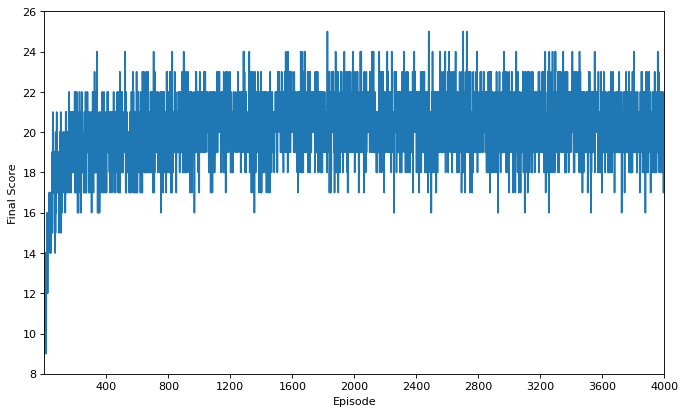

In [22]:
aux_plots.plot_scores(scores)

<AxesSubplot:xlabel='Episode', ylabel='Final Reward'>

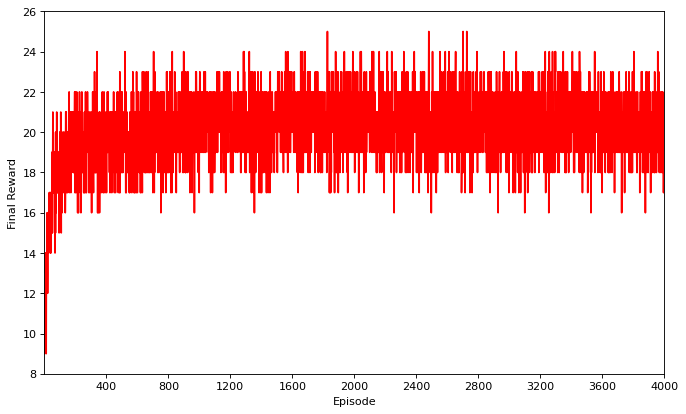

In [23]:
aux_plots.plot_rewards(total_rewards)

## Serialize the model

In [24]:
# exp = serializer.Experiment(agent, scores, total_rewards, reduce_state, reward_policy)
# exp.save_experiment('QL_base_2_actions')

In [28]:
stop

NameError: name 'stop' is not defined

## Experiments

### Influence of the number of actions

As the goal of the game is to cross all the lanes, we propose that it would be enought if the chicken use just the two actions move **up** or **stay** and never move **down**.
<br>
In order to test our hypothesis, we ran the agent using 3 and 2 actions.  


Parameters used:
```
GAMMA = 0.99
AVAILABLE_ACTIONS = {2, 3}
N0 = 2.5

reward_policy.REWARD_IF_CROSS = 1
reward_policy.REWARD_IF_COLLISION = 0
reward_policy.REWARD_IF_STILL = 0
```

In [16]:
scores_2act = read_int_array_from_file("QL/QL_scores_2act.txt")
total_rewards_2act = read_int_array_from_file("QL/QL_total_rewards_2act.txt")
scores_3act = read_int_array_from_file("QL/QL_scores_3act.txt")
total_rewards_3act = read_int_array_from_file("QL/QL_total_rewards_3act.txt")

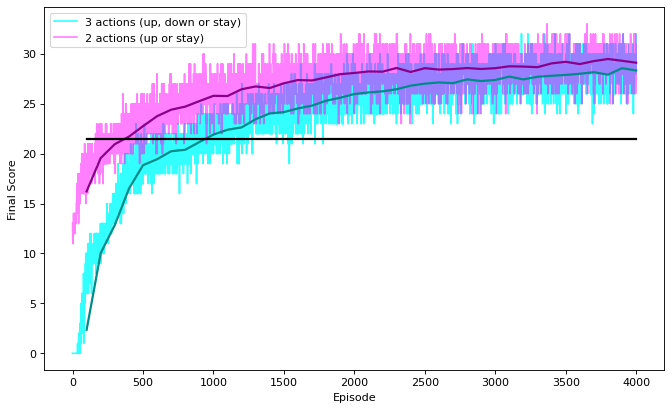

In [20]:
# ---------- Scores of the agent with 2 and 3 actions ----------

baseline = [baseline_mean_score for i in range(4000)]
ax = aux_plots.plot_2scores(scores_3act[:4000], scores_2act[:4000], "3 actions (up, down or stay)", "2 actions (up or stay)")
aux_plots.moving_average(scores_2act[:4000], ax, label='2 actions moving avg', color='darkmagenta')
aux_plots.moving_average(scores_3act, ax, label='3 actions moving avg', color='darkcyan')
aux_plots.moving_average(baseline, ax, label='Baseline', color='black')

From the graph above, we can see that when using only two actions the agent learns faster than with three actions, thus leading to better results in less iterations.

As we said before, this is expected and we will now be focusing only on testing with two actions.

# SARSA(λ)

In [ ]:
env, initial_state = environment.get_env()

In [ ]:
agent = agents.SarsaLambda(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0, lambd=LAMBD)

In [ ]:
scores = []
total_rewards = []

In [ ]:
%%timeit
n_runs = 1

for i in range(n_runs):
    render = i % 200 == 199
    
    agent.reset_E()

    game_over = False
    state = env.reset()
    state = reduce_state(state)[RAM_mask].data.tobytes()  # Select useful bytes
    action = agent.act(state)
    
    score = 0
    total_reward = 0

    while not game_over:
        if render:
            time.sleep(0.005)
            env.render()

        old_state = state
        old_action = action
        ob, reward, game_over, _ = env.step(action)

        ob = reduce_state(ob)
        reward = reward_policy(reward, ob, action)

        total_reward += reward

        if reward == reward_policy.REWARD_IF_CROSS:
            score += 1

        state = ob[RAM_mask].data.tobytes()

        action = agent.act(state)  # Next action

        agent.update_Q(old_s=old_state, new_s=state, old_a=old_action, new_a=action, reward=reward)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

In [ ]:
#10.2 s ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
aux_plots.plot_scores(scores)

In [ ]:
aux_plots.plot_rewards(total_rewards)

In [ ]:
stop

# Monte Carlo Control

The Monte Carlo algorithm receives the $\gamma$ and the $N0$ parameters.  
<br>
$\gamma$ is the discount factor; This parameters determines the importance of future rewards. A value of 0 makes the agent short-sighned by only considering current rewards, while a factor approaching 1 will make it strive for a long term reward.  
<br>
The $N0$ parameter is used to define the agent's exploration rate $\epsilon$, where $\epsilon = N0/(N0+n)$ and $n$ is the number of visits in the states.  
<br>
In the algorithm, the value function is initialized to zero. 


In [ ]:
env, initial_state = environment.get_env()

In [ ]:
agent = agents.MonteCarloControl(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [ ]:
def MonteCarloES(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env
                                   , reduce_state=reduce_state
                                   , reward_policy=reward_policy
                                   , agent=agent
                                   , RAM_mask=RAM_mask
                                   , render=render)
    return agent.update_policy(epi)

In [ ]:
%%time
MonteCarloES(RAM_mask=RAM_mask, render=False)

In [ ]:
scores = []
total_rewards = []

In [ ]:
%%time

n_runs = 1000

for i in range(n_runs):
    render = i % 201 == 200

    score, total_reward = MonteCarloES(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

In [ ]:
aux_plots.plot_scores(scores)

In [ ]:
aux_plots.plot_rewards(total_rewards)

In [ ]:
stop

## Fixed epsilon Monte Carlo

In [ ]:
env, initial_state = environment.get_env()

In [ ]:
agent = agents.MonteCarloControlFixedEpsilon(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, epsilon=0.05)

In [ ]:
def MonteCarloES(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env
                                   , reduce_state=reduce_state
                                   , reward_policy=reward_policy
                                   , agent=agent
                                   , RAM_mask=RAM_mask
                                   , render=render)
    return agent.update_policy(epi)

In [ ]:
scores = []
total_rewards = []

In [ ]:
%%time

n_runs = 1000

for i in range(n_runs):
    render = i % 201 == 200

    score, total_reward = MonteCarloES(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

In [ ]:
aux_plots.plot_scores(scores)

In [ ]:
aux_plots.plot_rewards(total_rewards)

# Gifs

In [ ]:
from matplotlib import animation
# From https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553
def _save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

In [ ]:
def generate_gif(fn: str, agent):
    env, initial_state = environment.get_env()
    game_over = False
    state = reduce_state(initial_state)[RAM_mask].data.tobytes()  # Select useful bytes
    action = agent.act(state)

    frames = []
    FRAME_FREQ = 2

    for t in range(1000):
        if t % FRAME_FREQ == 0:
            frames.append(env.render(mode="rgb_array"))

        ob, _, game_over, _ = env.step(action)

        ob = reduce_state(ob)
        state = ob[RAM_mask].data.tobytes()
        action = agent.act(state)  # Next action

        if game_over:
            break

    _save_frames_as_gif(frames=frames, path='./gif/', filename=f'{fn}.gif')

In [ ]:
%%time
generate_gif('MC_fixed_epsilon', agent)

![SegmentLocal](./gif/MC_fixed_epsilon.gif)
![SegmentLocal](./gif/MC_fixed_epsilon.gif)
![SegmentLocal](./gif/MC_fixed_epsilon.gif)

In [ ]:
stop

# Linear function approximators

The previous algorithms aim to solve control problems using a model free approach that depends on Q tables, which are structures that store the values associated with how good it is to take an action A in a state S, called Q values.

Although using Q tables are good for solving small learning problems, they suffer with a trouble called the curse of dimensionality, in which even some small environments can generate a huge amount of possible states, requiring a large amount of memory that is not available. This drawback often prevents those techniques to be used in many tasks from real life that could benefit from it.

One of the solutions developed to deal with this problem is Function Approximation. On it, instead of trying to find the optimal values for a very large table, we try to find the best parameters for a parameterized function whose objective is to approximate the optimal values that we would find on that table.

Mathematically, we say that we have a family of parameterized functions $\mathcal{Q}$ given by $Q_{\theta}: S\times A \rightarrow \mathbb{R}$, where $\theta$ is an array of parameters in $\mathbb{R}^d$, called weights, and $d << |S|$. Given that, the objective of a function approximator is to find the array of weights $\theta^*$ that produces the $Q_{\theta}^*$ that better approximates the optimal Q values ($Q^*$) for the problem addressed. Some of the greatest advantages of these algorithms is that they learn to generalize for unseen states and requires a much smaller set of values to be learned (d instead of |S|).

For this project, we experimented with linear function approximators, which are given by the following equation, where $\hat{q}(s,a)$ is the approximated value of choosing action **a** in state **s**, $\theta_i$ is the i-th element of the array of parameters and $x_i$ is a function that turns the action-state pair into the i-th feature of a d-dimensional feature array.

$\hat{q}(s,a,\theta) = \sum_{i = 1}^d \theta_i*x_i(s,a)$

In order to discover the best parameters, we applied a Stochastic Gradient Descent algorithm to update the weights, given by the equation below:

$\theta = \theta + \alpha*(target - \hat{q}(S_t, A_t, \theta))*x(S_t, A_t)$

The **target** is the value that our function approximator tries to achieve at each update and it changes for each algorithm approximated (Monte Carlo, Q Learning and Sarsa Lambda), and $\alpha$ is a learning step size.

One of the critical points of function approximators is the choice of the features to be used to represent the states. Depending on their choice, we can build good or bad function approximators. For this project, we experimented with a set of different features, as described in the next sections.

# Final Thoughts

## Computational cost

One of the biggest problems on this project was the computational cost of running an episode.

Since each run plays for 2 minutes and 16 seconds in the original game, there are quite a lot of frames that need to be computed for each episode.
Even though the frame-sync is deactivated in our environment, each time we execute on episode it takes about 2 seconds to compute it for Q-Learn and Monte Carlo, and XXXXXXXXXX seconds for SARSA(λ).

The memory usage is fairly low compared to the time that it takes to run the algorithms, even with a decent amount of unique states in our problem.

...............